# Veri Bilimi icin istatistik

#### 01- Ornek Teorisi
#### 02- Betimsel istatistikler
#### 03- Guven Araliklari
#### 04- Olasilik Dagilimlari
#### 05- Hipotez Testleri
#### 06- Varyans Analizi
#### 07- Korelasyon Analizi

Yeni Kutuphaneler

01 - researchpy
!pip install researchpy
import researchpy as rp

02 - statsmodels.stats.api
import statsmodels.stats.api as sms



# <font color=red>01 - Ornek Teorisi<font>

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# Amac 10.000 kisilik bir ilcenin Yas ortalamasini bulmak

# 0 - 80 yas arliginda random 10.000 sayi olustur
populasyon = np.random.randint(0, 80, 10000)

In [3]:
populasyon[0:10]

array([39, 69, 46, 18, 15, 29, 19, 51, 26, 56])

### 1.1. Orneklem Cekimi

In [4]:
# Her orneklem cekiminde ayni populasyon ve orneklemi cekecek,bu yuzden seed kullanilir.
# Not : 115 onemli degil, istedigin sayi gir

np.random.seed(115)
orneklem = np.random.choice(a= populasyon, size= 100)
orneklem[0:10]

array([20, 45,  6, 70, 32, 41, 28, 15, 51, 63])

In [5]:
#orneklem Ortalama

orneklem.mean()

40.21

In [6]:
#Populasyon Ortalama ==> Dikkat ikisi ne kadar da yakin !!!!

populasyon.mean()

39.5362

### 1.2. Orneklem Dagilimi

In [7]:
np.random.seed(10)
orneklem1 = np.random.choice(a= populasyon, size= 100)
orneklem2 = np.random.choice(a= populasyon, size= 100)
orneklem3 = np.random.choice(a= populasyon, size= 100)
orneklem4 = np.random.choice(a= populasyon, size= 100)
orneklem5 = np.random.choice(a= populasyon, size= 100)
orneklem6 = np.random.choice(a= populasyon, size= 100)
orneklem7 = np.random.choice(a= populasyon, size= 100)
orneklem8 = np.random.choice(a= populasyon, size= 100)
orneklem9 = np.random.choice(a= populasyon, size= 100)
orneklem10 = np.random.choice(a= populasyon, size= 100)

#### Bu 10 Orneklemenin ortalamasi hesaplanir

In [8]:
list1 = [orneklem1, orneklem2, orneklem3, orneklem4, orneklem5, orneklem6, orneklem7,orneklem8,
        orneklem9, orneklem10]
toplam  = 0
for i in list1:
    toplam+= i.mean()
    print(i.mean())
print('Ortalamasi = ', toplam/10)

40.81
41.17
41.0
39.69
40.23
38.46
36.48
37.16
40.68
40.59
Ortalamasi =  39.626999999999995


In [9]:
orneklem1.mean()

40.81

In [10]:
orneklem2.mean()

41.17

In [11]:
orneklem4.mean()

39.69

# <font color=red>02 - Betimsel istatistikler<font>

In [12]:
import seaborn as sns
tips = sns.load_dataset('tips')
df = tips.copy()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


### Yeni Kutuphane inidirdik ===>  !pip install researchpy


In [14]:
!pip install researchpy
import researchpy as rp

In [15]:
# Numeric Degiskenler icin summary_cont

# -----Default ayarlari-------
# summary_cont(group1, conf = 0.95, decimals = 4) ===> decimal = ondalik 4

# Variable  = Degiskenler
# N         = Gozlem Sayisi
# Mean      = Ortalama
# SD        = Standart Sapma
# SE        = Standart Hatasi
# %95 Confindence interval = Guven Araligi ===> (18.6633 - 20.9086)

rp.summary_cont(df[['total_bill', 'tip', 'size']])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,total_bill,244.0,19.7859,8.9024,0.5699,18.6633,20.9086
1,tip,244.0,2.9983,1.3836,0.0886,2.8238,3.1728
2,size,244.0,2.5697,0.9511,0.0609,2.4497,2.6896


In [16]:
# Kategorik Degiskenler icin summary_cat

# -----Default ayarlari-------
#summary_cat(group1, ascending= False)

rp.summary_cat(df[['sex', 'smoker', 'day', 'time']])

,Variable,Outcome,Count,Percent
0,sex,Male,157,64.34
1,,Female,87,35.66
2,smoker,No,151,61.89
3,,Yes,93,38.11
4,day,Sat,87,35.66
5,,Sun,76,31.15
6,,Thur,62,25.41
7,,Fri,19,7.79
8,time,Dinner,176,72.13
9,,Lunch,68,27.87


## <font color=blue>Kovaryans (Covaryans)<font>

In [17]:
# Kovaryans = iki degiskenin iliskilerinin degisimi

df[['tip', 'total_bill']].cov()

,tip,total_bill
tip,1.914455,8.323502
total_bill,8.323502,79.252939


## <font color=blue>Korelasyon (Corelasyon)<font>

In [18]:
# Korelasyon = Degiskenler arasindaki iliski (-1, 0, 1) 

df[['tip', 'total_bill']].corr()

,tip,total_bill
tip,1.000000,0.675734
total_bill,0.675734,1.000000


In [19]:
# Not:  Tip ile Total_bill arasinda orta siddete pozitif yonlu Korelasyon var (0.67)

In [20]:
### Korelasyon Grafigi

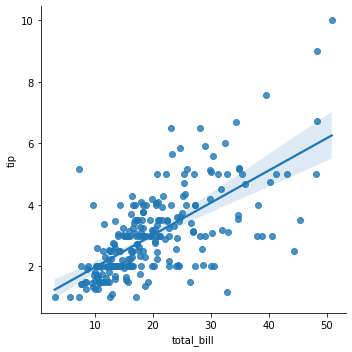

In [21]:
sns.lmplot(x= 'total_bill', y= 'tip', data= df);

# <font color=red>03 - Guven Araligi<font>

In [22]:
# Problem :
# CEO fiyat belirleme konusunda bilimsel bir dayanak ve esneklik istiyor

# Detaylar:
# 1 - Satici , alici ve urun var.
# 2 - Alicilara urune ne kadar ucret odersiniz diye soruluyor.
# 3 - Optimum fiyat bilimsel ve esnek olarak bulunmak isteniyor.

In [23]:
fiyatlar = np.random.randint(10, 110, 1000)
fiyatlar.mean()

58.492

### Yeni Kutuphane ekledik ====> statsmodels.stats.api

In [24]:
import statsmodels.stats.api as sms

In [25]:
# confidence interval (guven araligi)

sms.DescrStatsW(fiyatlar).tconfint_mean()  

(56.67953887736034, 60.30446112263965)

In [26]:
# Not : Kullanicilarin urunu almak icin odemeyi goze aldigi fiyat;
# istatistiksel olalarak %95 guvenilirlik ile 56 - 60 arasindadir demek

# alfa ile ilgilenmiyoruz (simdilik), Hata Payin hep %5 alacagiz , sistemde default olarak %95 tanimli zaten

# <font color=red>04 - Olasilik Dagilimlari<font>
#### <font color=red>Belirsizlik altinda karar vermeye calisiyoruz ! <font>

## <font color=blue>4.1. - Bernoulli Dagilimi<font>  

${\displaystyle f(k;p)=p^{k}(1-p)^{1-k}\quad {\text{for }}k\in \{0,1\}}$


${\displaystyle \operatorname {E} \left(X\right)=p}$

$\operatorname {Var} [X]=pq=p(1-p)$

#### Yeni Kutuphane ekledik ====> from scipy.stats import bernoulli

In [2]:
# Olasilik Dagilimi islemleri icin Scipy kullanilir

from scipy.stats import bernoulli

In [7]:
#p=  Tura gelme olasiligi (Biz verdik bunu , sonuca ulasmisiz gibi yaptik)

p = 0.6

In [8]:
#pmf = probability mass func.(olasilik kutle fonk.)

rv = bernoulli(p)
rv.pmf(k = 1) # Tura olma olasiligi                

0.6

In [9]:
rv.pmf(k = 0)  # Yazi olma olasiligi

0.4

## <font color=blue>4.2. - Buyuk Sayilar Yasasi<font> 

In [35]:
# rng = np.random.RandomState(123)  ===> Random islemlerini sabitlemek icin (np.random.seed(115) ayni)

rng = np.random.RandomState(123)
for i in range(1,21):
    deney_sayisi = 2**i
    yazi_turalar = rng.randint(0, 2, size= deney_sayisi)
    yazi_olasiliklari = np.mean(yazi_turalar)
    print('Atis Sayisi: ', deney_sayisi, '----', 'Yazi olasiligi: %.2f' % (yazi_olasiliklari * 100))

Atis Sayisi:  2 ---- Yazi olasiligi: 50.00
Atis Sayisi:  4 ---- Yazi olasiligi: 0.00
Atis Sayisi:  8 ---- Yazi olasiligi: 62.50
Atis Sayisi:  16 ---- Yazi olasiligi: 43.75
Atis Sayisi:  32 ---- Yazi olasiligi: 46.88
Atis Sayisi:  64 ---- Yazi olasiligi: 56.25
Atis Sayisi:  128 ---- Yazi olasiligi: 50.78
Atis Sayisi:  256 ---- Yazi olasiligi: 52.73
Atis Sayisi:  512 ---- Yazi olasiligi: 52.93
Atis Sayisi:  1024 ---- Yazi olasiligi: 50.20
Atis Sayisi:  2048 ---- Yazi olasiligi: 48.58
Atis Sayisi:  4096 ---- Yazi olasiligi: 49.49
Atis Sayisi:  8192 ---- Yazi olasiligi: 49.58
Atis Sayisi:  16384 ---- Yazi olasiligi: 49.96
Atis Sayisi:  32768 ---- Yazi olasiligi: 50.00
Atis Sayisi:  65536 ---- Yazi olasiligi: 49.68
Atis Sayisi:  131072 ---- Yazi olasiligi: 49.97
Atis Sayisi:  262144 ---- Yazi olasiligi: 50.13
Atis Sayisi:  524288 ---- Yazi olasiligi: 50.01
Atis Sayisi:  1048576 ---- Yazi olasiligi: 50.09


## <font color=blue>4.3. - Binom Dagilimi<font> 

${\displaystyle f(k;n,p)={n \choose k}p^{k}(1-p)^{n-k}}$, k = 0, 1, 2, ...,n


${\displaystyle \operatorname {E} (X)=np}$


${\displaystyle \operatorname {Var} (X)=np(1-p)}$

#### Yeni Kutuphane ekledik ====> from scipy.stats import binom

In [44]:
from scipy.stats import binom

# Problem : bir sirkette verilen 100 Reklami 1,5,10 kisinin gorme olasiligi
# Bilinen deger p = 0.01 (binom olasilik degeri biliniyor)

# p = BINOM Olasilik degeri
# n = Deneme Sayisi
# k = rassal degiskenin alacagi degerler (1,5,10)  ===> k veya x ayni seyler

p = 0.01
n = 100
rv = binom(n,p)
print(rv.pmf(1))
print(rv.pmf(5))
print(rv.pmf(10))

## <font color=blue>4.4. - Poisson Dagilimi<font>

${\displaystyle f(x,\lambda )={\frac {\lambda ^{x}e^{-\lambda }}{x!}}\,\!}$,  x = 0,1,2,...,n

#### Yeni Kutuphane ekledik ====> from scipy.stats import poisson

In [48]:
from scipy.stats import poisson

In [49]:
lambda_ = 0.1

In [54]:
# Problem : Bir sirkette hatali ilan girisi hesaplanmak isteniyor

# Bilinen deger Lamda = 0.1 (ortalama hata sayisi)
# x = rassal degerin alacagi deger (0, 3, 5)  ===> Hic hata olmamasi, 3 hata olmasi , 5 hata olasi durumu

rv = poisson(mu= lambda_)
print(rv.pmf(k= 0))
print(rv.pmf(k= 3))
print(rv.pmf(k= 5))

0.9048374180359595
0.00015080623633932676
7.54031181696634e-08


## <font color=blue>4.5. - Normal Dagilim<font>
    
${\displaystyle f(x\mid \mu ,\sigma ^{2})={\frac {1}{\sqrt {2\pi \sigma ^{2}}}}e^{-{\frac {(x-\mu )^{2}}{2\sigma ^{2}}}}}$

* $\mu$  ortalama ya da dağılımın beklenen değeri

* ${\displaystyle \sigma }$  standart sapma

* ${\displaystyle \sigma ^{2}}$ varyans

#### Yeni Kutuphane ekledik ====> from scipy.stats import norm

In [55]:
from scipy.stats import norm

In [61]:
# Problem : Bir sirkette ortalama satis =  80k, standart sapma = 5k,
#Dagilim =  Normal (Hipotez ve benzeri testler sonucu dagilimin normal oldugu bulunur)

#90K'dan fazla satis yapma olasiligi

1-norm.cdf(90, 80, 5)    # ===> 1- norm.cdf(istenen_deger, ortalama, standart_sapma )

0.02275013194817921

In [62]:
#70K'dan fazla satis yapma olasiligi

1-norm.cdf(70, 80, 5)

0.9772498680518208

In [63]:
#73K'den az satis yapma olasiligi  (Dikkat 1 -norm yapmadik !!!!)

norm.cdf(73, 80, 5)

0.08075665923377107

In [64]:
# 85 ile 90 arasinda olma olasiligi

(1 - norm.cdf(85, 80, 5)) - (1- norm.cdf(90, 80, 5))

0.13590512198327787

In [66]:
# 85 ile 90 arasinda olma olasiligi (Farkli)

norm.cdf(90, 80, 5) - norm.cdf(85, 80, 5)

0.13590512198327787

# <font color=red>05 - Hipotez Testleri<font>

## <font color=red>05.A - Tek Orneklem T Testi (Parametrik)<font>


Örnek ortalamasına ilişkin test yapmak için kullanılır.

**Hipotezler:**

<d><i>H</i><sub>0</sub>: <i>μ</i> = <i>50</i></d>   
<d><i>H</i><sub>1</sub>: <i>μ</i> ≠ <i>50</i></d><br><br>

<d><i>H</i><sub>0</sub>: <i>μ</i> <= <i>50</i></d><br>
<d><i>H</i><sub>1</sub>: <i>μ</i> > <i>50</i></d><br><br>

<d><i>H</i><sub>0</sub>: <i>μ</i> >= <i>50</i></d><br>
<d><i>H</i><sub>1</sub>: <i>μ</i> < <i>50</i></d><br><br>




<table></table>

**Test İstatistiği:**

${\displaystyle t={\frac {{\bar {x}}-\mu _{0}}{\frac {s}{\sqrt {n}}}}}$

#### Problem : internet sitemizde gecirilen surenin 170 sn fazla mi az mi oldugu kontrol edilmek isteniyor.
##### H0  = 170
##### H1 != 170

In [29]:
olcumler = np.array([17, 160, 234, 149, 145, 107, 197, 75, 201, 225, 211, 119, 
              157, 145, 127, 244, 163, 114, 145,  65, 112, 185, 202, 146,
              203, 224, 203, 114, 188, 156, 187, 154, 177, 95, 165, 50, 110, 
              216, 138, 151, 166, 135, 155, 84, 251, 173, 131, 207, 121, 120])

In [30]:
olcumler[0:10]

array([ 17, 160, 234, 149, 145, 107, 197,  75, 201, 225])

#### Yeni Kutuphane ekledik ====> from scipy.stats import stats

In [32]:
import scipy.stats as stats

In [168]:
# Farkli bir Describe Methodu kullandik (DataFrame olmadan describe yapabilmek icin(numpy formatinin describe i))

# nobs = gozlem sayisi
# skewnes = carpiklik  (sag - sol)
# kurtosis = basiklik  (alt - ust)

stats.describe(olcumler)

DescribeResult(nobs=50, minmax=(17, 251), mean=154.38, variance=2578.0363265306123, skewness=-0.32398897278694483, kurtosis=-0.05849823498415985)

In [ ]:
# mean = 154 (ortalama gecirilen sure) o zaman neden 170 arastiriyoruz ?
# Cevap : Bu olcumler tesadufi olusamaz mi, orneklem yanlis olamaz mi diye.

## <font color=blue>5.1 Varsayimlar<font>

### <font color=blue>5.A.1.1 Normallik Varsayimi (Orneklem dagiliminin dagilimi normaldir)<font>

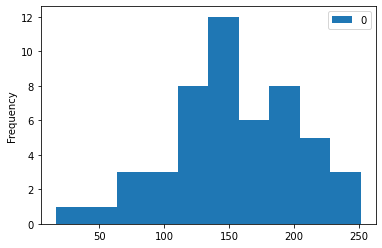

In [38]:
# histogram

pd.DataFrame(olcumler).plot.hist();

#### Yeni Kutuphane ekledik ====> import pylab

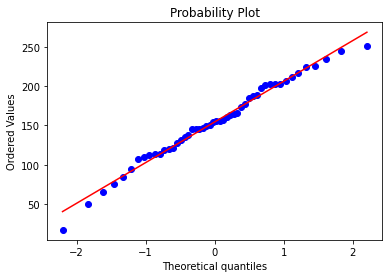

In [43]:
#qqplot
import pylab
stats.probplot(olcumler, dist="norm", plot=pylab)
pylab.show()

## <font color=blue>Shapiro-Wilks Testi<font>
H0: Örnek dağılımı ile teorik normal dağılım arasında istatistiksel olarak anlanmli bir farklilik yoktur

H1: ... fark vardır
    
#### <font color=red>Not : H0 i reddetmek istemiyoruz , bu yuzden pvalue > 0.05 olmali !!!!!<font>

#### Yeni Kutuphane ekledik ====> from scipy.stats import shapiro

In [40]:
from scipy.stats import shapiro

In [41]:
shapiro(olcumler)

ShapiroResult(statistic=0.9853105545043945, pvalue=0.7848747968673706)

In [44]:
print('Test Hesap istatistigi: ', shapiro(olcumler)[0])
print('Hesaplanan P - Value: ', shapiro(olcumler)[1])

Test Hesap istatistigi:  0.9853105545043945
Hesaplanan P - Value:  0.7848747968673706


## Testin Uygulanmasi

In [45]:
stats.ttest_1samp(olcumler, popmean= 170)

Ttest_1sampResult(statistic=-2.1753117985877966, pvalue=0.034460415195071446)

Not: P - Value < 0.05 oldugu icin , internet sitesinde gecirilen sure 170'tir.

H0 = 170 dogrudur. (ret edilmez)

H1 ≠ 170 yanlistir. (ret edilir)

## <font color=red>05.B - Nonparametrik Tek Orneklem Testi <font>

#### Yeni Kutuphane ekledik ====> from statsmodels.stats.descriptivestats import sign_test

In [47]:
from statsmodels.stats.descriptivestats import sign_test

In [48]:
sign_test(olcumler, 170)

(-7.0, 0.06490864707227217)

Not1 : Genellikle solda Test istatistigi , sagdaki de P -Value degeridir.

Not2 : Dagilim carpik oldugunda ortalama ve parametrik test kullanilamaz. Eger elimizdeki olcumler paratmetrik varsayimlari saglamasaydi nonparametrik testi yapar ve P-Value degerine gore yorum yapardik.

Not3 : P - Value < 0.05 degil ......????? 

## <font color=red>05.C - Tek Orneklem Oran Testi <font>
    
H0: p = 0.125
    
H1: p != 0.125

Problem : Bir reklamin donusum orani 0.125 olarak bize bildirilmis. Bunu kontrol etmek istiyoruz

Detaylar: 500 kisi dis mecracada reklama tiklamis , 40 tanesi alisveris yapmis.

ornek uzerinden donusum orani : 50 / 400 = 0.08 (Yani 0.125 yanlis demek, bunu ispatlayacagiz)

#### Yeni Kutuphane ekledik ====> from statsmodels.stats.proportion import proportions_ztest

In [50]:
from statsmodels.stats.proportion import proportions_ztest

In [51]:
count = 40
nobs = 500
value = 0.125

In [52]:
proportions_ztest(count, nobs, value)

(-3.7090151628513017, 0.0002080669689845979)

In [ ]:
# Sonuc = P-Value < 0.05 old. icin H0 ret edilir.

## <font color=red>05.D - Bagimsiz iki Orneklem  Testi (Parametrik)<font>
    
H0: M1 = M2
    
H1: M1!= M2
    
Problem : Yeni ML uygulanan sistemin geliri artirip artirmadigini kontrol ediyoruz , eski sistem ile elde edilen gelirleri, yeni ML ile elde edilen gelirler ile (ortalama) karsilastiriyoruz.

In [53]:
# Veri Tipi I

In [54]:
A = pd.DataFrame([30,27,21,27,29,30,20,20,27,32,35,22,24,23,25,27,23,27,23,
        25,21,18,24,26,33,26,27,28,19,25])

B = pd.DataFrame([37,39,31,31,34,38,30,36,29,28,38,28,37,37,30,32,31,31,27,
        32,33,33,33,31,32,33,26,32,33,29])


A_B = pd.concat([A, B], axis = 1)
A_B.columns = ["A","B"]

A_B.head()

,A,B
0,30,37
1,27,39
2,21,31
3,27,31
4,29,34


In [55]:
# Veri Tipi II

#En zor sekli duzenli sekli ile duzenliyebilirsin

In [170]:
A = pd.DataFrame([30,27,21,27,29,30,20,20,27,32,35,22,24,23,25,27,23,27,23,
        25,21,18,24,26,33,26,27,28,19,25])

B = pd.DataFrame([37,39,31,31,34,38,30,36,29,28,38,28,37,37,30,32,31,31,27,
        32,33,33,33,31,32,33,26,32,33,29])

#A ve A'nın grubu                     
GRUP_A = np.arange(len(A))
GRUP_A = pd.DataFrame(GRUP_A)
GRUP_A[:] = "A"
A = pd.concat([A, GRUP_A], axis = 1)

#B ve B'nin Grubu
GRUP_B = np.arange(len(B))
GRUP_B = pd.DataFrame(GRUP_B)
GRUP_B[:] = "B"
B = pd.concat([B, GRUP_B], axis = 1)

#Tum veri
AB = pd.concat([A,B])
AB.columns = ["gelir","GRUP"]
print(AB.head())
print(AB.tail())

   gelir GRUP
0     30    A
1     27    A
2     21    A
3     27    A
4     29    A
    gelir GRUP
25     33    B
26     26    B
27     32    B
28     33    B
29     29    B


In [172]:
A.head(3)

,0,0
0,30,A
1,27,A
2,21,A


In [173]:
B.head(3)

,0,0
0,37,B
1,39,B
2,31,B


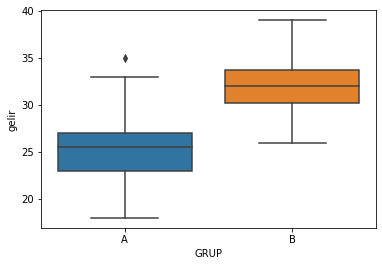

In [85]:
sns.boxplot(x= 'GRUP', y= 'gelir', data= AB);

# Varsayim Kontrolu

In [86]:
A_B.head()

,A,B
0,30,37
1,27,39
2,21,31
3,27,31
4,29,34


In [87]:
AB.head()

,gelir,GRUP
0,30,A
1,27,A
2,21,A
3,27,A
4,29,A


### Normallik Varsayimi (Shaprio Testi)

In [91]:
shapiro(A_B.A)  # A icin P-Value >0.05 old. icin H0 ret edilmez , dagilimlar aynidir

ShapiroResult(statistic=0.9789242148399353, pvalue=0.7962799668312073)

In [93]:
shapiro(A_B.B)  # B icin P-Value >0.05 old. icin H0 ret edilmez , dagilimlar aynidir

ShapiroResult(statistic=0.9561261534690857, pvalue=0.2458445429801941)

### Varyans Homojenligi Varsayimi

H0: varyanslar Homojendir

H1: varyanslar Hom. degildir.

In [94]:
stats.levene(A_B.A, A_B.B)  # P-Value >0.05 old. icin H0 ret edilmez, Vary. Homojendir

LeveneResult(statistic=1.1101802757158004, pvalue=0.2964124900636569)

# Hipotez Testin Uygulanmasi (A\B Testi)

In [174]:
stats.ttest_ind(A_B['A'], A_B['B'], equal_var= True)

Ttest_indResult(statistic=-7.028690967745927, pvalue=2.6233215605475075e-09)

In [96]:
test_istatistigi, pvalue = stats.ttest_ind(A_B["A"], A_B["B"], equal_var=True)
print('Test İstatistiği = %.4f, p-değeri = %.4f' % (test_istatistigi, pvalue))

Test İstatistiği = -7.0287, p-değeri = 0.0000


--------------------------- Sonuc -------------------------------------

1-  Iki sistemin gelir karsilastirilmasi yapiliyor. (ortalamalari karsilastiriliyor)

2 - P-Value degeri < 0.05 old. icin H0 ret edilmez.

3-  
H0: M1 = M2   (gelir ortalamari esittir)
    
H1: M1!= M2   (gelir ort. esit degildir.)
    
4 - iki sistemin gelir ortalamalari esit degildir SONUCUNA ulasiyoruz.

## <font color=red>05.E -  Nonparametrik Bagimsiz iki Orneklem Testi <font>

Ne zaman kullainilir:

Hem Normallik varsayimi, hem de Varyans Homejenligi saglanmiyorsa 
Nonparametrik iki Orneklem Testi yapilir.

In [175]:
stats.mannwhitneyu(A_B['A'], A_B['B'])

MannwhitneyuResult(statistic=89.5, pvalue=9.557950378612535e-08)

In [100]:
test_istatistigi, pvalue = stats.mannwhitneyu(A_B['A'], A_B['B'])
print('Test İstatistiği = %.4f, p-değeri = %.4f' % (test_istatistigi, pvalue))

Test İstatistiği = 89.5000, p-değeri = 0.0000


Sonuc: p < 0.05 oldugu icin 
m1 = m2 (mu) ret edilir,
Hem parametrik yaklasim ile hemde nonparametrik yaklasim ile bu farki ispat ettik.

# <font color=red>05.F - Parametrik Bagimli iki Orneklem Testi <font>